In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from IPython.display import display

In [14]:
#Importamos la base de datos
properati = pd.read_csv("properati_Tasado_Lineal.csv")

In [24]:
#Test de tasado lineal
properati.shape
Target = properati[["price_usd_per_m2"]]
Features = properati.drop(columns=["price_usd_per_m2","Unnamed: 0","state_name","description","title"])

In [23]:
p

,Unnamed: 0,state_name,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description,title,prop_type_PH,prop_type_apartment,prop_type_house,prop_type_store,curr_ARS,curr_USD
0,0,Capital Federal,62000.0,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,0,0,0,0,1
1,2,Capital Federal,72000.0,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,0,1,0,0,0,1
2,4,Buenos Aires Costa Atlántica,64000.0,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,0,1,0,0,0,1
3,6,Bs.As. G.B.A. Zona Norte,130000.0,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",1,0,0,0,0,1
4,7,Capital Federal,138000.0,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,0,1,0,0,0,1
5,8,Capital Federal,195000.0,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",0,1,0,0,0,1
6,12,Bs.As. G.B.A. Zona Norte,115000.0,2029117.50,115000.00,39.0,36.0,2948.717949,3194.444444,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,0,1,0,0,0,1
7,14,Capital Federal,147900.0,2609621.55,147900.00,42.0,31.0,3521.428571,4770.967742,Torre II Dalí. Ambiente unico divisible.Vitrau...,Vitraux Palermo,0,1,0,0,0,1
8,16,Capital Federal,239000.0,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,Ventas Mataderos al frente Duplex 4 amb.- Plan...,VENTA-MATADEROS-DUPLEX 4 AMB.,1,0,0,0,0,1
9,17,Bs.As. G.B.A. Zona Norte,315000.0,5558017.50,315000.00,176.0,78.0,1789.772727,4038.461538,Excelente 3 ambientes en un 6 piso y con terra...,3 ambientes en venta en Acqua Golf 1 en Nordel...,0,1,0,0,0,1


In [28]:
# Generamos las matrices y el target

#X = Features
X = Features[["price_aprox_usd"]]
y = Target[["price_usd_per_m2"]]

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto =', model.intercept_)
print ('RM = ', model.coef_)
print ('R2_train =', model.score(X, y))

Intercepto = [1654.05275719]
RM =  [[0.00162182]]
R2_train = 0.14998526967980208


In [29]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

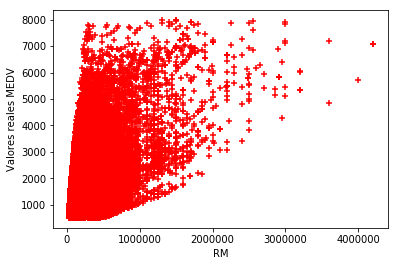

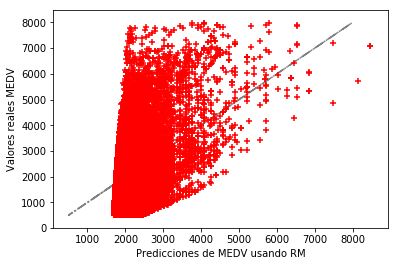

In [30]:
# Graficamos la variable X contra la variable Y
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

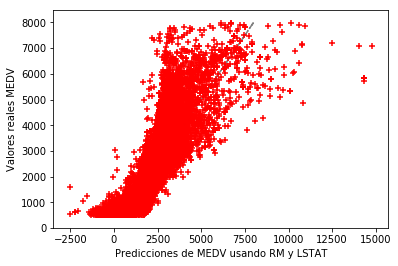

EMC: 315099.77201063733


In [31]:
lm = linear_model.LinearRegression()

X = Features
#X = Features[["price_aprox_usd"]]
y = Target[["price_usd_per_m2"]]

model = lm.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM y LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)